In [3]:
%pylab inline
from astropy import units
from profiles import *
from cosmotools import concentration, rvir
import os.path
from subprocess import call

font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


## Sag is modeled using a NFW profile for the DM halo. 

In [5]:
M_heavy = 1E11
M_light = 3.2E10
#print M_light, M_heavy

c_heavy = concentration(M_heavy)
c_light = concentration(M_light)

rvir_heavy = rvir(M_heavy, 0)
rvir_light = rvir(M_light, 0)

print M_heavy, M_light

print rvir_heavy / 6.5
print rvir_light / 4.9

print c_heavy, c_light, rvir_heavy, rvir_light, rvir_heavy/c_heavy, rvir_light/c_light

359.295478591 1.29448373621e+41 km2 solMass / (kpc3 Mpc2)
359.295478591 1.29448373621e+41 km2 solMass / (kpc3 Mpc2)
1e+11 32000000000.0
18.7493737139 kpc
17.0119475452 kpc
11.718954823 12.7644654358 121.87092914 kpc 83.3585429717 kpc 10.3994708557 kpc 6.53051578154 kpc


In [7]:
sag_heavy = np.loadtxt("./sag_orbit/facundo/sgr_orbit_heavy.dat")
sag_light = np.loadtxt("./sag_orbit/facundo/sgr_orbit_light.dat")

MW = loadtxt('./sag_orbit/facundo/MW_orb.dat')
Sag = loadtxt('./sag_orbit/facundo/Sgr_orb.dat')

In [9]:
t1 = MW[:,-1]  - 1.7

xMW = MW[:,0]
yMW = MW[:,1]
zMW = MW[:,2]

xSag = Sag[:,0]
ySag = Sag[:,1]
zSag = Sag[:,2]

vxMW = MW[:,3]
vyMW = MW[:,4]
vzMW = MW[:,5]

vxSag = Sag[:,3]
vySag = Sag[:,4]
vzSag = Sag[:,5]

R_nbody = np.sqrt((xSag - xMW)**2 + (ySag - yMW)**2 + (zSag - zMW)**2)
vR_nbody = np.sqrt((vxSag - vxMW)**2 + (vySag - vyMW)**2 + (vzSag - vzMW)**2)

In [10]:
t = sag_heavy[:,0]
x_sag = sag_heavy[:,1]
y_sag = sag_heavy[:,2]
z_sag = sag_heavy[:,3]
x_mw = sag_heavy[:,4]
y_mw = sag_heavy[:,5]
z_mw = sag_heavy[:,6]

vx_sag = sag_heavy[:,7]
vy_sag = sag_heavy[:,8]
vz_sag = sag_heavy[:,9]
vx_mw = sag_heavy[:,10]
vy_mw = sag_heavy[:,11]
vz_mw = sag_heavy[:,12]

x_sagl = sag_light[:,1]
y_sagl = sag_light[:,2]
z_sagl = sag_light[:,3]
x_mwl = sag_light[:,4]
y_mwl = sag_light[:,5]
z_mwl = sag_light[:,6]

vx_sagl = sag_light[:,7]
vy_sagl = sag_light[:,8]
vz_sagl = sag_light[:,9]
vx_mwl = sag_light[:,10]
vy_mwl = sag_light[:,11]
vz_mwl = sag_light[:,12]

In [11]:
R = np.sqrt((x_sag - x_mw)**2 + (y_sag - y_mw)**2 + (z_sag - z_mw)**2)
V = np.sqrt((vx_sag - vx_mw)**2 + (vy_sag - vy_mw)**2 + (vz_sag - vz_mw)**2)


Rl = np.sqrt((x_sagl - x_mwl)**2 + (y_sagl - y_mwl)**2 + (z_sagl - z_mwl)**2)
Vl = np.sqrt((vx_sagl - vx_mwl)**2 + (vy_sagl - vy_mwl)**2 + (vz_sagl - vz_mwl)**2)

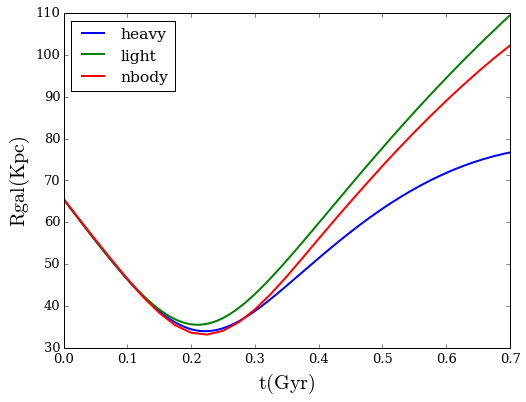

In [61]:
figure(figsize=(8, 6))
plot(t, R, lw=2, label='heavy')
plot(t, Rl, lw=2, label='light')
plot(t1, R_nbody, lw=2, label='nbody')
legend(loc='best')
xlabel("$\mathrm{t(Gyr)}$", fontsize=20)
ylabel("$\mathrm{Rgal(Kpc)}$", fontsize=20)
savefig("sag_orbit/facundo_plot_sag.png", bbox_inches='tight')


In [83]:
alpha = linspace(0.44, 0.6, 10)

for a in alpha:
    fileout = "orbit_alpha_heavy%f.dat"%(a)
    command = "python sgr_orbit_clmatch.py 1E11 18.74 121.87 %f > %s"%(a, fileout)
    retcode = call(command,shell=True)

In [23]:
alpha = linspace(0, 2, 10)

for a in alpha:
    fileout2 = "orbit_alpha_light%f.dat"%(a)
    command2 = "python sgr_orbit_clmatch.py 3.2E10 17.01 83.36 %f > %s"%(a, fileout2)
    retcode = call(command2,shell=True)

In [84]:
"""
orbit1 = np.loadtxt("orbit_alpha_heavy0.000000.dat")
orbit2 = np.loadtxt("orbit_alpha_heavy0.111111.dat")
orbit3 = np.loadtxt("orbit_alpha_heavy0.222222.dat")
orbit4 = np.loadtxt("orbit_alpha_heavy0.333333.dat")
orbit5 = np.loadtxt("orbit_alpha_heavy0.444444.dat")
orbit6 = np.loadtxt("orbit_alpha_heavy0.555556.dat")
orbit7 = np.loadtxt("orbit_alpha_heavy0.666667.dat")
orbit8 = np.loadtxt("orbit_alpha_heavy0.777778.dat")
orbit9 = np.loadtxt("orbit_alpha_heavy0.888889.dat")
"""

orbit1 = np.loadtxt("orbit_alpha_heavy0.444444.dat")
orbit2 = np.loadtxt("orbit_alpha_heavy0.455556.dat")
orbit3 = np.loadtxt("orbit_alpha_heavy0.457778.dat")
orbit4 = np.loadtxt("orbit_alpha_heavy0.466667.dat")
orbit5 = np.loadtxt("orbit_alpha_heavy0.475556.dat")
orbit6 = np.loadtxt("orbit_alpha_heavy0.477778.dat")
orbit7 = np.loadtxt("orbit_alpha_heavy0.488889.dat")
orbit8 = np.loadtxt("orbit_alpha_heavy0.493333.dat")
orbit9 = np.loadtxt("orbit_alpha_heavy0.500000.dat")


orbit1l = np.loadtxt("orbit_alpha_light0.000000.dat")
orbit2l = np.loadtxt("orbit_alpha_light0.222222.dat")
orbit3l = np.loadtxt("orbit_alpha_light0.444444.dat")
orbit4l = np.loadtxt("orbit_alpha_light0.666667.dat")
orbit5l = np.loadtxt("orbit_alpha_light0.888889.dat")
orbit6l = np.loadtxt("orbit_alpha_light1.111111.dat")
orbit7l = np.loadtxt("orbit_alpha_light1.333333.dat")
orbit8l = np.loadtxt("orbit_alpha_light1.555556.dat")
orbit9l = np.loadtxt("orbit_alpha_light1.777778.dat")

In [85]:
x_sag1 = orbit1[:,1]
y_sag1 = orbit1[:,2]
z_sag1 = orbit1[:,3]
x_mw1 = orbit1[:,4]
y_mw1 = orbit1[:,5]
z_mw1 = orbit1[:,6]

vx_sag1 = orbit1[:,7]
vy_sag1 = orbit1[:,8]
vz_sag1 = orbit1[:,9]
vx_mw1 = orbit1[:,10]
vy_mw1 = orbit1[:,11]
vz_mw1 = orbit1[:,12]

x_sag2 = orbit2[:,1]
y_sag2 = orbit2[:,2]
z_sag2 = orbit2[:,3]
x_mw2 = orbit2[:,4]
y_mw2 = orbit2[:,5]
z_mw2 = orbit2[:,6]

vx_sag2 = orbit2[:,7]
vy_sag2 = orbit2[:,8]
vz_sag2 = orbit2[:,9]
vx_mw2 = orbit2[:,10]
vy_mw2 = orbit2[:,11]
vz_mw2 = orbit2[:,12]

x_sag3 = orbit3[:,1]
y_sag3 = orbit3[:,2]
z_sag3 = orbit3[:,3]
x_mw3 = orbit3[:,4]
y_mw3 = orbit3[:,5]
z_mw3 = orbit3[:,6]

vx_sag3 = orbit3[:,7]
vy_sag3 = orbit3[:,8]
vz_sag3 = orbit3[:,9]
vx_mw3 = orbit3[:,10]
vy_mw3 = orbit3[:,11]
vz_mw3 = orbit3[:,12]

x_sag4 = orbit4[:,1]
y_sag4 = orbit4[:,2]
z_sag4 = orbit4[:,3]
x_mw4 = orbit4[:,4]
y_mw4 = orbit4[:,5]
z_mw4 = orbit4[:,6]

vx_sag4 = orbit4[:,7]
vy_sag4 = orbit4[:,8]
vz_sag4 = orbit4[:,9]
vx_mw4 = orbit4[:,10]
vy_mw4 = orbit4[:,11]
vz_mw4 = orbit4[:,12]

x_sag5 = orbit5[:,1]
y_sag5 = orbit5[:,2]
z_sag5 = orbit5[:,3]
x_mw5 = orbit5[:,4]
y_mw5 = orbit5[:,5]
z_mw5 = orbit5[:,6]

vx_sag5 = orbit5[:,7]
vy_sag5 = orbit5[:,8]
vz_sag5 = orbit5[:,9]
vx_mw5 = orbit5[:,10]
vy_mw5 = orbit5[:,11]
vz_mw5 = orbit5[:,12]


x_sag6 = orbit6[:,1]
y_sag6 = orbit6[:,2]
z_sag6 = orbit6[:,3]
x_mw6 = orbit6[:,4]
y_mw6 = orbit6[:,5]
z_mw6 = orbit6[:,6]

vx_sag6 = orbit6[:,7]
vy_sag6 = orbit6[:,8]
vz_sag6 = orbit6[:,9]
vx_mw6 = orbit6[:,10]
vy_mw6 = orbit6[:,11]
vz_mw6 = orbit6[:,12]


x_sag7 = orbit7[:,1]
y_sag7 = orbit7[:,2]
z_sag7 = orbit7[:,3]
x_mw7 = orbit7[:,4]
y_mw7 = orbit7[:,5]
z_mw7 = orbit7[:,6]

vx_sag7 = orbit7[:,7]
vy_sag7 = orbit7[:,8]
vz_sag7 = orbit7[:,9]
vx_mw7 = orbit7[:,10]
vy_mw7 = orbit7[:,11]
vz_mw7 = orbit7[:,12]

x_sag8 = orbit8[:,1]
y_sag8 = orbit8[:,2]
z_sag8 = orbit8[:,3]
x_mw8 = orbit8[:,4]
y_mw8 = orbit8[:,5]
z_mw8 = orbit8[:,6]

vx_sag8 = orbit8[:,7]
vy_sag8 = orbit8[:,8]
vz_sag8 = orbit8[:,9]
vx_mw8 = orbit8[:,10]
vy_mw8 = orbit8[:,11]
vz_mw8 = orbit8[:,12]


x_sag9 = orbit9[:,1]
y_sag9 = orbit9[:,2]
z_sag9 = orbit9[:,3]
x_mw9 = orbit9[:,4]
y_mw9 = orbit9[:,5]
z_mw9 = orbit9[:,6]

vx_sag9 = orbit9[:,7]
vy_sag9 = orbit9[:,8]
vz_sag9 = orbit9[:,9]
vx_mw9 = orbit9[:,10]
vy_mw9 = orbit9[:,11]
vz_mw9 = orbit9[:,12]

"""

x_sag10 = orbit10[:,1]
y_sag10 = orbit10[:,2]
z_sag10 = orbit10[:,3]
x_mw10 = orbit10[:,4]
y_mw10 = orbit10[:,5]
z_mw10 = orbit10[:,6]

vx_sag10 = orbit10[:,7]
vy_sag10 = orbit10[:,8]
vz_sag10 = orbit10[:,9]
vx_mw10 = orbit10[:,10]
vy_mw10 = orbit10[:,11]
vz_mw10 = orbit10[:,12]


"""

R1 = np.sqrt((x_sag1 - x_mw1)**2 + (y_sag1 - y_mw1)**2 + (z_sag1 - z_mw1)**2)
V1 = np.sqrt((vx_sag1 - vx_mw1)**2 + (vy_sag1 - vy_mw1)**2 + (vz_sag1 - vz_mw1)**2)

R2 = np.sqrt((x_sag2 - x_mw2)**2 + (y_sag2 - y_mw2)**2 + (z_sag2 - z_mw2)**2)
V2 = np.sqrt((vx_sag2 - vx_mw2)**2 + (vy_sag2 - vy_mw2)**2 + (vz_sag2 - vz_mw2)**2)

R3 = np.sqrt((x_sag3 - x_mw3)**2 + (y_sag3 - y_mw3)**2 + (z_sag3 - z_mw3)**2)
V3 = np.sqrt((vx_sag3 - vx_mw3)**2 + (vy_sag3 - vy_mw3)**2 + (vz_sag3 - vz_mw3)**2)

R4 = np.sqrt((x_sag4 - x_mw4)**2 + (y_sag4 - y_mw4)**2 + (z_sag4 - z_mw4)**2)
V4 = np.sqrt((vx_sag4 - vx_mw4)**2 + (vy_sag4 - vy_mw4)**2 + (vz_sag4 - vz_mw4)**2)

R5 = np.sqrt((x_sag5 - x_mw5)**2 + (y_sag5 - y_mw5)**2 + (z_sag5 - z_mw5)**2)
V5 = np.sqrt((vx_sag5 - vx_mw5)**2 + (vy_sag5 - vy_mw5)**2 + (vz_sag5 - vz_mw5)**2)

R6 = np.sqrt((x_sag6 - x_mw6)**2 + (y_sag6 - y_mw6)**2 + (z_sag6 - z_mw6)**2)
V6 = np.sqrt((vx_sag6 - vx_mw6)**2 + (vy_sag6 - vy_mw6)**2 + (vz_sag6 - vz_mw6)**2)

R7 = np.sqrt((x_sag7 - x_mw7)**2 + (y_sag7 - y_mw7)**2 + (z_sag7 - z_mw7)**2)
V7 = np.sqrt((vx_sag7 - vx_mw7)**2 + (vy_sag7 - vy_mw7)**2 + (vz_sag7 - vz_mw7)**2)

R8 = np.sqrt((x_sag8 - x_mw8)**2 + (y_sag8 - y_mw8)**2 + (z_sag8 - z_mw8)**2)
V8 = np.sqrt((vx_sag8 - vx_mw8)**2 + (vy_sag8 - vy_mw8)**2 + (vz_sag8 - vz_mw8)**2)

R9 = np.sqrt((x_sag9 - x_mw9)**2 + (y_sag9 - y_mw9)**2 + (z_sag9 - z_mw9)**2)
V9 = np.sqrt((vx_sag9 - vx_mw9)**2 + (vy_sag9 - vy_mw9)**2 + (vz_sag9 - vz_mw9)**2)

#R10 = np.sqrt((x_sag10 - x_mw10)**2 + (y_sag10 - y_mw10)**2 + (z_sag10 - z_mw10)**2)
#V10 = np.sqrt((vx_sag10 - vx_mw10)**2 + (vy_sag10 - vy_mw10)**2 + (vz_sag10 - vz_mw10)**2)

In [86]:
x_sag1l = orbit1l[:,1]
y_sag1l = orbit1l[:,2]
z_sag1l = orbit1l[:,3]
x_mw1l = orbit1l[:,4]
y_mw1l = orbit1l[:,5]
z_mw1l = orbit1l[:,6]

vx_sag1l = orbit1l[:,7]
vy_sag1l = orbit1l[:,8]
vz_sag1l = orbit1l[:,9]
vx_mw1l = orbit1l[:,10]
vy_mw1l = orbit1l[:,11]
vz_mw1l = orbit1l[:,12]

x_sag2l = orbit2l[:,1]
y_sag2l = orbit2l[:,2]
z_sag2l = orbit2l[:,3]
x_mw2l = orbit2l[:,4]
y_mw2l = orbit2l[:,5]
z_mw2l = orbit2l[:,6]

vx_sag2l = orbit2l[:,7]
vy_sag2l = orbit2l[:,8]
vz_sag2l = orbit2l[:,9]
vx_mw2l = orbit2l[:,10]
vy_mw2l = orbit2l[:,11]
vz_mw2l = orbit2l[:,12]

x_sag3l = orbit3l[:,1]
y_sag3l = orbit3l[:,2]
z_sag3l = orbit3l[:,3]
x_mw3l = orbit3l[:,4]
y_mw3l = orbit3l[:,5]
z_mw3l = orbit3l[:,6]

vx_sag3l = orbit3l[:,7]
vy_sag3l = orbit3l[:,8]
vz_sag3l = orbit3l[:,9]
vx_mw3l = orbit3l[:,10]
vy_mw3l = orbit3l[:,11]
vz_mw3l = orbit3l[:,12]

x_sag4l = orbit4l[:,1]
y_sag4l = orbit4l[:,2]
z_sag4l = orbit4l[:,3]
x_mw4l = orbit4l[:,4]
y_mw4l = orbit4l[:,5]
z_mw4l = orbit4l[:,6]

vx_sag4l = orbit4l[:,7]
vy_sag4l = orbit4l[:,8]
vz_sag4l = orbit4l[:,9]
vx_mw4l = orbit4l[:,10]
vy_mw4l = orbit4l[:,11]
vz_mw4l = orbit4l[:,12]

x_sag5l = orbit5l[:,1]
y_sag5l = orbit5l[:,2]
z_sag5l = orbit5l[:,3]
x_mw5l = orbit5l[:,4]
y_mw5l = orbit5l[:,5]
z_mw5l = orbit5l[:,6]

vx_sag5l = orbit5l[:,7]
vy_sag5l = orbit5l[:,8]
vz_sag5l = orbit5l[:,9]
vx_mw5l = orbit5l[:,10]
vy_mw5l = orbit5l[:,11]
vz_mw5l = orbit5l[:,12]


x_sag6l = orbit6l[:,1]
y_sag6l = orbit6l[:,2]
z_sag6l = orbit6l[:,3]
x_mw6l = orbit6l[:,4]
y_mw6l = orbit6l[:,5]
z_mw6l = orbit6l[:,6]

vx_sag6l = orbit6l[:,7]
vy_sag6l = orbit6l[:,8]
vz_sag6l = orbit6l[:,9]
vx_mw6l = orbit6l[:,10]
vy_mw6l = orbit6l[:,11]
vz_mw6l = orbit6l[:,12]


x_sag7l = orbit7l[:,1]
y_sag7l = orbit7l[:,2]
z_sag7l = orbit7l[:,3]
x_mw7l = orbit7l[:,4]
y_mw7l = orbit7l[:,5]
z_mw7l = orbit7l[:,6]

vx_sag7l = orbit7l[:,7]
vy_sag7l = orbit7l[:,8]
vz_sag7l = orbit7l[:,9]
vx_mw7l = orbit7l[:,10]
vy_mw7l = orbit7l[:,11]
vz_mw7l = orbit7l[:,12]

x_sag8l = orbit8l[:,1]
y_sag8l = orbit8l[:,2]
z_sag8l = orbit8l[:,3]
x_mw8l = orbit8l[:,4]
y_mw8l = orbit8l[:,5]
z_mw8l = orbit8l[:,6]

vx_sag8l = orbit8l[:,7]
vy_sag8l = orbit8l[:,8]
vz_sag8l = orbit8l[:,9]
vx_mw8l = orbit8l[:,10]
vy_mw8l = orbit8l[:,11]
vz_mw8l = orbit8l[:,12]


x_sag9l = orbit9l[:,1]
y_sag9l = orbit9l[:,2]
z_sag9l = orbit9l[:,3]
x_mw9l = orbit9l[:,4]
y_mw9l = orbit9l[:,5]
z_mw9l = orbit9l[:,6]

vx_sag9l = orbit9l[:,7]
vy_sag9l = orbit9l[:,8]
vz_sag9l = orbit9l[:,9]
vx_mw9l = orbit9l[:,10]
vy_mw9l = orbit9l[:,11]
vz_mw9l = orbit9l[:,12]

"""

x_sag10 = orbit10[:,1]
y_sag10 = orbit10[:,2]
z_sag10 = orbit10[:,3]
x_mw10 = orbit10[:,4]
y_mw10 = orbit10[:,5]
z_mw10 = orbit10[:,6]

vx_sag10 = orbit10[:,7]
vy_sag10 = orbit10[:,8]
vz_sag10 = orbit10[:,9]
vx_mw10 = orbit10[:,10]
vy_mw10 = orbit10[:,11]
vz_mw10 = orbit10[:,12]


"""

R1l = np.sqrt((x_sag1l - x_mw1l)**2 + (y_sag1l - y_mw1l)**2 + (z_sag1l - z_mw1l)**2)
V1l = np.sqrt((vx_sag1l - vx_mw1l)**2 + (vy_sag1l - vy_mw1l)**2 + (vz_sag1l - vz_mw1l)**2)

R2l = np.sqrt((x_sag2l - x_mw2l)**2 + (y_sag2l - y_mw2l)**2 + (z_sag2l - z_mw2l)**2)
V2l = np.sqrt((vx_sag2l - vx_mw2l)**2 + (vy_sag2l - vy_mw2l)**2 + (vz_sag2l - vz_mw2l)**2)

R3l = np.sqrt((x_sag3l - x_mw3l)**2 + (y_sag3l - y_mw3l)**2 + (z_sag3l - z_mw3l)**2)
V3l = np.sqrt((vx_sag3l - vx_mw3l)**2 + (vy_sag3l - vy_mw3l)**2 + (vz_sag3l - vz_mw3l)**2)

R4l = np.sqrt((x_sag4l - x_mw4l)**2 + (y_sag4l - y_mw4l)**2 + (z_sag4l - z_mw4l)**2)
V4l = np.sqrt((vx_sag4l - vx_mw4l)**2 + (vy_sag4l - vy_mw4l)**2 + (vz_sag4l - vz_mw4l)**2)

R5l = np.sqrt((x_sag5l - x_mw5l)**2 + (y_sag5l - y_mw5l)**2 + (z_sag5l - z_mw5l)**2)
V5l = np.sqrt((vx_sag5l - vx_mw5l)**2 + (vy_sag5l - vy_mw5l)**2 + (vz_sag5l - vz_mw5l)**2)

R6l = np.sqrt((x_sag6l - x_mw6l)**2 + (y_sag6l - y_mw6l)**2 + (z_sag6l - z_mw6l)**2)
V6l = np.sqrt((vx_sag6l - vx_mw6l)**2 + (vy_sag6l - vy_mw6l)**2 + (vz_sag6l - vz_mw6l)**2)

R7l = np.sqrt((x_sag7l - x_mw7l)**2 + (y_sag7l - y_mw7l)**2 + (z_sag7l - z_mw7l)**2)
V7l = np.sqrt((vx_sag7l - vx_mw7l)**2 + (vy_sag7l - vy_mw7l)**2 + (vz_sag7l - vz_mw7l)**2)

R8l = np.sqrt((x_sag8l - x_mw8l)**2 + (y_sag8l - y_mw8l)**2 + (z_sag8l - z_mw8l)**2)
V8l = np.sqrt((vx_sag8l - vx_mw8l)**2 + (vy_sag8l - vy_mw8l)**2 + (vz_sag8l - vz_mw8l)**2)

R9l = np.sqrt((x_sag9l - x_mw9l)**2 + (y_sag9l - y_mw9l)**2 + (z_sag9l - z_mw9l)**2)
V9l = np.sqrt((vx_sag9l - vx_mw9l)**2 + (vy_sag9l - vy_mw9l)**2 + (vz_sag9l - vz_mw9l)**2)

#R10 = np.sqrt((x_sag10 - x_mw10)**2 + (y_sag10 - y_mw10)**2 + (z_sag10 - z_mw10)**2)
#V10 = np.sqrt((vx_sag10 - vx_mw10)**2 + (vy_sag10 - vy_mw10)**2 + (vz_sag10 - vz_mw10)**2)

In [124]:
vx_sag3[-1] - vx_mw3[-1], vxSag[-1] - vxMW[-1]

(136.19432760820001, 130.25680650000001)

In [87]:
print R1[-1]-R_nbody[-1]
print R2[-1]-R_nbody[-1]
print R3[-1]-R_nbody[-1]
print R4[-1]-R_nbody[-1]
print R5[-1]-R_nbody[-1]
print R6[-1]-R_nbody[-1]
print R7[-1]-R_nbody[-1]
print R8[-1]-R_nbody[-1]
print R9[-1]-R_nbody[-1]

0.546891269374
0.105305163399
0.016667367131
-0.339053805713
-0.696595431418
-0.786257111438
-1.23633684452
-1.41716507032
-1.68932531304


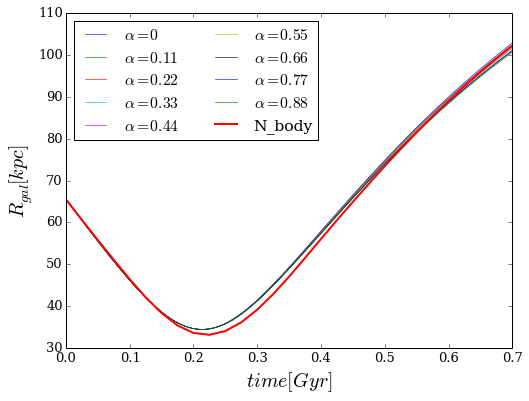

In [88]:
figure(figsize=(8, 6))
plot(t, R1, label=r'$\alpha = 0$', lw=0.6)
plot(t, R2, label=r'$\alpha = 0.11$', lw=0.6)
plot(t, R3, label=r'$\alpha = 0.22$', lw=0.6)
plot(t, R4, label=r'$\alpha = 0.33$', lw=0.6)
plot(t, R5, label=r'$\alpha = 0.44$', lw=0.6)
plot(t, R6, label=r'$\alpha = 0.55$', lw=0.6)
plot(t, R7, label=r'$\alpha = 0.66$', lw=0.6)
plot(t, R8, label=r'$\alpha = 0.77$', lw=0.6)
plot(t, R9, label=r'$\alpha = 0.88$', lw=0.6)
#plot(t, R10, label=r'$\alpha = 0.499$', lw=0.6)

plot(t1, R_nbody, label='N_body', lw=2)
legend(loc='best', ncol=2)
ylabel('$R_{gal}[kpc]$', fontsize=20)
xlabel('$time[Gyr]$', fontsize=20)
#savefig('orbits_comparison_pos.png', bbox_inches='tight')

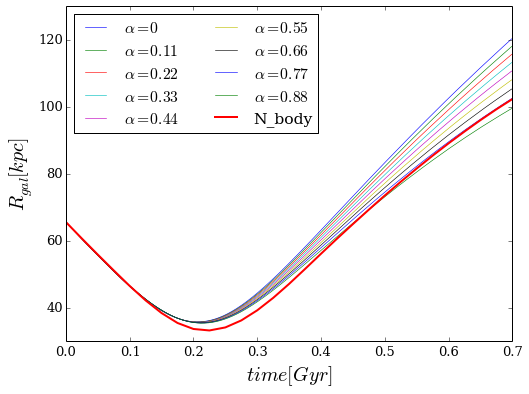

In [33]:
figure(figsize=(8, 6))
plot(t, R1l, label=r'$\alpha = 0$', lw=0.6)
plot(t, R2l, label=r'$\alpha = 0.11$', lw=0.6)
plot(t, R3l, label=r'$\alpha = 0.22$', lw=0.6)
plot(t, R4l, label=r'$\alpha = 0.33$', lw=0.6)
plot(t, R5l, label=r'$\alpha = 0.44$', lw=0.6)
plot(t, R6l, label=r'$\alpha = 0.55$', lw=0.6)
plot(t, R7l, label=r'$\alpha = 0.66$', lw=0.6)
plot(t, R8l, label=r'$\alpha = 0.77$', lw=0.6)
plot(t, R9l, label=r'$\alpha = 0.88$', lw=0.6)
#plot(t, R10, label=r'$\alpha = 0.499$', lw=0.6)

plot(t1, R_nbody, label='N_body', lw=2)
legend(loc='best', ncol=2)
ylabel('$R_{gal}[kpc]$', fontsize=20)
xlabel('$time[Gyr]$', fontsize=20)

In [34]:
V1 = V1 * units.kpc / units.Gyr
V1 = V1.to(units.km/units.s)

V2 = V2 * units.kpc / units.Gyr
V2 = V2.to(units.km/units.s)

V3 = V3 * units.kpc / units.Gyr
V3 = V3.to(units.km/units.s)

V4 = V4 * units.kpc / units.Gyr
V4 = V4.to(units.km/units.s)

V5 = V5 * units.kpc / units.Gyr
V5 = V5.to(units.km/units.s)

V6 = V6 * units.kpc / units.Gyr
V6 = V6.to(units.km/units.s)

V7 = V7 * units.kpc / units.Gyr
V7 = V7.to(units.km/units.s)

V8 = V8 * units.kpc / units.Gyr
V8 = V8.to(units.km/units.s)

V9 = V9 * units.kpc / units.Gyr
V9 = V9.to(units.km/units.s)



V1l = V1l * units.kpc / units.Gyr
V1l = V1l.to(units.km/units.s)

V2l = V2l * units.kpc / units.Gyr
V2l = V2l.to(units.km/units.s)

V3l = V3l * units.kpc / units.Gyr
V3l = V3l.to(units.km/units.s)

V4l = V4l * units.kpc / units.Gyr
V4l = V4l.to(units.km/units.s)

V5l = V5l * units.kpc / units.Gyr
V5l = V5l.to(units.km/units.s)

V6l = V6l * units.kpc / units.Gyr
V6l = V6l.to(units.km/units.s)

V7l = V7l * units.kpc / units.Gyr
V7l = V7l.to(units.km/units.s)

V8l = V8l * units.kpc / units.Gyr
V8l = V8l.to(units.km/units.s)

V9l = V9l * units.kpc / units.Gyr
V9l = V9l.to(units.km/units.s)
#V10 = V10 * units.kpc / units.Gyr
#V10 = V10.to(units.km/units.s)

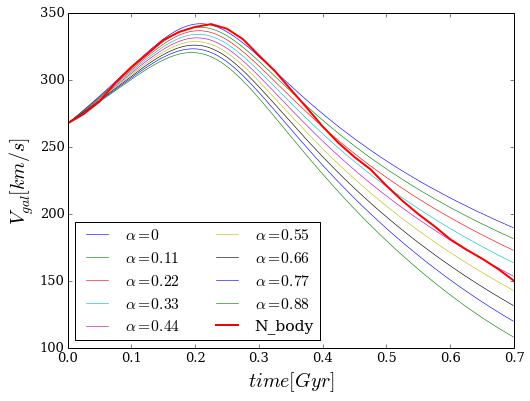

In [35]:
figure(figsize=(8, 6))
plot(t, V1, label=r'$\alpha = 0$', lw=0.6)
plot(t, V2, label=r'$\alpha = 0.11$', lw=0.6)
plot(t, V3, label=r'$\alpha = 0.22$', lw=0.6)
plot(t, V4, label=r'$\alpha = 0.33$', lw=0.6)
plot(t, V5, label=r'$\alpha = 0.44$', lw=0.6)
plot(t, V6, label=r'$\alpha = 0.55$', lw=0.6)
plot(t, V7, label=r'$\alpha = 0.66$', lw=0.6)
plot(t, V8, label=r'$\alpha = 0.77$', lw=0.6)
plot(t, V9, label=r'$\alpha = 0.88$', lw=0.6)

plot(t1, vR_nbody, label='N_body', lw=2)
legend(loc='best', ncol=2)
ylabel('$V_{gal}[km/s]$', fontsize=20)
xlabel('$time[Gyr]$', fontsize=20)
savefig('orbits_comparison_vel.png', bbox_inches='tight')

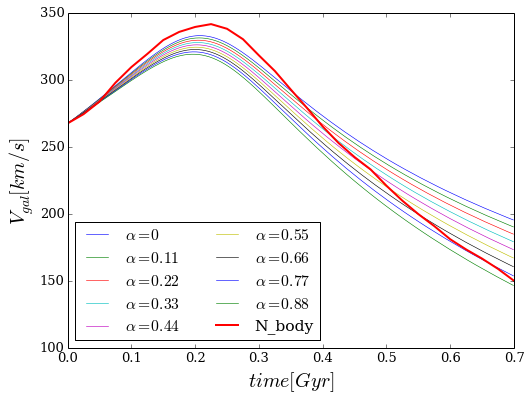

In [37]:
figure(figsize=(8, 6))
plot(t, V1l, label=r'$\alpha = 0$', lw=0.6)
plot(t, V2l, label=r'$\alpha = 0.11$', lw=0.6)
plot(t, V3l, label=r'$\alpha = 0.22$', lw=0.6)
plot(t, V4l, label=r'$\alpha = 0.33$', lw=0.6)
plot(t, V5l, label=r'$\alpha = 0.44$', lw=0.6)
plot(t, V6l, label=r'$\alpha = 0.55$', lw=0.6)
plot(t, V7l, label=r'$\alpha = 0.66$', lw=0.6)
plot(t, V8l, label=r'$\alpha = 0.77$', lw=0.6)
plot(t, V9l, label=r'$\alpha = 0.88$', lw=0.6)

plot(t1, vR_nbody, label='N_body', lw=2)
legend(loc='best', ncol=2)
ylabel('$V_{gal}[km/s]$', fontsize=20)
xlabel('$time[Gyr]$', fontsize=20)
#savefig('orbits_comparison_vel.png', bbox_inches='tight')

In [89]:
!python sgr_orbit.py 1E11 18.74 121.87 0.457 > sag_orbit_heavy.dat

In [40]:
!python sgr_orbit.py 1E11 18.74 121.87 1 > sag_orbit_heavy_1.dat

In [90]:
!python sgr_orbit.py 3.2E10 17.01 83.36 0.457 > sag_orbit_light.dat

In [42]:
!python sgr_orbit.py 3.2E10 17.01 83.36 1 > sag_orbit_light_1.dat

In [107]:
data_heavy = loadtxt("sag_orbit_heavy.dat")
t_h = data_heavy[:,0]

x_sag_h = data_heavy[:,1]
y_sag_h = data_heavy[:,2]
z_sag_h = data_heavy[:,3]
x_mw_h = data_heavy[:,4]
y_mw_h = data_heavy[:,5]
z_mw_h = data_heavy[:,6]

vx_sag_h = data_heavy[:,7]
vy_sag_h = data_heavy[:,8]
vz_sag_h = data_heavy[:,9]
vx_mw_h = data_heavy[:,10]
vy_mw_h = data_heavy[:,11]
vz_mw_h = data_heavy[:,12]


data_light = loadtxt("sag_orbit_light.dat")
t_l = data_light[:,0]

x_sag_l = data_light[:,1]
y_sag_l = data_light[:,2]
z_sag_l = data_light[:,3]
x_mw_l = data_light[:,4]
y_mw_l = data_light[:,5]
z_mw_l = data_light[:,6]

vx_sag_l = data_light[:,7]
vy_sag_l = data_light[:,8]
vz_sag_l = data_light[:,9]
vx_mw_l = data_light[:,10]
vy_mw_l = data_light[:,11]
vz_mw_l = data_light[:,12]

In [108]:
R_h = np.sqrt( (x_sag_h - x_mw_h)**2 + (y_sag_h - y_mw_h)**2 + (z_sag_h - z_mw_h)**2)
V_h = np.sqrt( (vx_sag_h - vx_mw_h)**2 + (vy_sag_h - vy_mw_h)**2 + (vz_sag_h - vz_mw_h)**2)

R_l = np.sqrt( (x_sag_l - x_mw_l)**2 + (y_sag_l - y_mw_l)**2 + (z_sag_l - z_mw_l)**2)
V_l = np.sqrt( (vx_sag_l - vx_mw_l)**2 + (vy_sag_l - vy_mw_l)**2 + (vz_sag_l - vz_mw_l)**2)

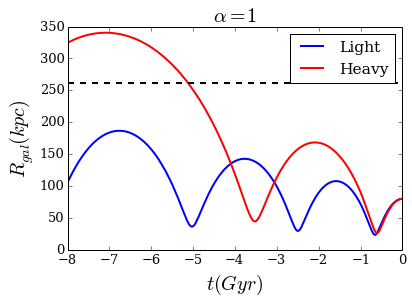

In [109]:
plot(t_l, R_l, label='Light', lw=2)
plot(t_h, R_h, label='Heavy', lw=2, c='r')
legend(loc='best')
ylabel('$R_{gal}(kpc)$', fontsize=20)
xlabel('$t(Gyr)$', fontsize=20)
plt.axhline(261, ls='--', lw=2, c='k')
title(r'$\alpha=1$', fontsize=20)
#savefig('./sag_orbit/sag_orbit.png', bbox_inches='tight')

In [110]:
def IC(R, t):
    y = abs(R - 261.0)
    index = where((y==min(y)) & (t>-6))
    return index

In [111]:
index_light = IC(R_l, t_l)
index_heavy = IC(R_h, t_h)

print t_l[index_light]
print x_sag_l[index_light]
print y_sag_l[index_light]
print z_sag_l[index_light]
print vx_sag_l[index_light]
print vy_sag_l[index_light]
print vz_sag_l[index_light]

[]
[]
[]
[]
[]
[]
[]


In [112]:
print x_mw_l[index_light]
print y_mw_l[index_light]
print z_mw_l[index_light]
print vx_mw_l[index_light]
print vy_mw_l[index_light]
print vz_mw_l[index_light]

[]
[]
[]
[]
[]
[]


In [113]:
print t_h[index_heavy]
print x_sag_h[index_heavy]
print y_sag_h[index_heavy]
print z_sag_h[index_heavy]
print vx_sag_h[index_heavy]
print vy_sag_h[index_heavy]
print vz_sag_h[index_heavy]

[-5.115]
[-206.66494274]
[ 0.]
[-231.59311661]
[ 95.0578288]
[ 0.]
[ 23.50661303]


In [114]:
print x_mw_h[index_heavy]
print y_mw_h[index_heavy]
print z_mw_h[index_heavy]
print vx_mw_h[index_heavy]
print vy_mw_h[index_heavy]
print vz_mw_h[index_heavy]

[ 6.36125918]
[ 0.]
[-80.85194118]
[-9.64808436]
[ 0.]
[ 24.01978613]
